In [55]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [11]:
df_kNN = pd.read_csv('cv_pred_KNN_olya.csv')
df_RFC = pd.read_csv('cv_pred_RFC_olya.csv')
df_XGB = pd.read_csv('cv_pred_XGB_olya.csv')

df_kNN.columns = ['id', 'kNN']
df_RFC.columns = ['id', 'RFC']
df_XGB.columns = ['id', 'XGB']

train = pd.read_csv('olya_train.csv')
train.rename(columns={'Unnamed: 0':'id'}, inplace=True)

target = pd.read_csv('target_train_train.csv', header=None)
target.columns = ['id', 'target']

In [14]:
train.head()

,id,time_break_days_max,time_break_days_mean,num_visits,cum_vol,2017-11,v_l__length,v_l,"v_l__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""slope""",sum_b,...,percent,most_popular_azs,v_l__c3__lag_2,mean_vol,sum_q,v_l__percentage_of_reoccurring_values_to_all_values,v_l__count_above_mean,v_l__ratio_beyond_r_sigma__r_1,q,"v_l__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept"""
0,21-186G-1172,26.0,4.666667,77,813.22,536.6374,45.0,434.45,0.288167,15682.25,...,229.48,14193.0,837.490555,10.561299,1,0.577778,21.0,0.133333,1,3.058000
1,21-186G-1190,146.0,19.861111,39,389.97,92.7264,21.0,199.07,3.655000,7246.41,...,472.80,14343.0,602.501996,9.999231,3,0.380952,9.0,0.238095,2,-0.831667
2,21-186G-1193,196.0,21.090909,34,426.03,447.8361,4.0,72.31,0.034835,2747.25,...,0.00,1335.0,0.000000,12.530294,2,0.000000,3.0,0.250000,1,0.000000
3,21-186G-12,29.0,6.712871,128,2708.58,3087.9877,39.0,842.01,0.154167,31279.70,...,910.83,11126.0,10654.559036,21.160781,23,0.102564,17.0,0.358974,2,-0.404000
4,21-186G-1201,36.0,7.743902,102,1154.55,988.3505,28.0,319.06,-1.778571,13267.67,...,99.09,1340.0,963.633289,11.319118,29,0.392857,14.0,0.178571,12,0.000000


In [13]:
df_preds = df_kNN.set_index('id').join(df_RFC.set_index('id')).join(df_XGB.set_index('id')).join(target.set_index('id'))
df_preds.head()

,kNN,RFC,XGB,target
id,,,,
21-186G-1172,0.046667,0.056589,0.056793,0
21-186G-1190,0.253333,0.194899,0.162258,0
21-186G-1193,0.413333,0.436984,0.401287,1
21-186G-12,0.026667,0.018188,0.027014,0
21-186G-1201,0.080000,0.071219,0.080449,0


In [28]:
full_df_preds = df_preds.join(train.set_index('id'))

In [19]:
df_preds['kNN1'] = df_preds['kNN'].round()
df_preds['RFC1'] = df_preds['RFC'].round()
df_preds['XGB1'] = df_preds['XGB'].round()
df_preds.head(20)

,kNN,RFC,XGB,target,kNN1,RFC1,XGB1
id,,,,,,,
21-186G-1172,0.046667,0.056589,0.056793,0,0.0,0.0,0.0
21-186G-1190,0.253333,0.194899,0.162258,0,0.0,0.0,0.0
21-186G-1193,0.413333,0.436984,0.401287,1,0.0,0.0,0.0
21-186G-12,0.026667,0.018188,0.027014,0,0.0,0.0,0.0
21-186G-1201,0.080000,0.071219,0.080449,0,0.0,0.0,0.0
21-186G-1215,0.253333,0.281034,0.250442,0,0.0,0.0,0.0
21-186G-122,0.116667,0.103720,0.146525,0,0.0,0.0,0.0
21-186G-123,0.046667,0.037698,0.042693,0,0.0,0.0,0.0
21-186G-1244,0.026667,0.023097,0.037872,0,0.0,0.0,0.0


In [20]:
df_preds.sum()

kNN       6697.296667
RFC       7199.413979
XGB       7328.561575
target    7178.000000
kNN1       679.000000
RFC1      1731.000000
XGB1      1846.000000
dtype: float64

In [22]:
sorted_RFC = df_preds.sort_values('RFC')

In [24]:
sorted_RFC

,kNN,RFC,XGB,target,kNN1,RFC1,XGB1
id,,,,,,,
21-8AF-13382,0.000000,0.007690,0.006523,0,0.0,0.0,0.0
21-8AE-19961,0.000000,0.007690,0.007962,0,0.0,0.0,0.0
21-8AG-16733,0.000000,0.007690,0.006523,0,0.0,0.0,0.0
21-8AE-17943,0.000000,0.007978,0.007125,0,0.0,0.0,0.0
21-8AH-7728,0.003333,0.007978,0.008476,0,0.0,0.0,0.0
21-8AG-8794,0.000000,0.007978,0.008502,0,0.0,0.0,0.0
21-8AD-9352,0.003333,0.007978,0.006523,0,0.0,0.0,0.0
21-8AD-19319,0.000000,0.007978,0.007629,0,0.0,0.0,0.0
21-8AG-4692,0.000000,0.007978,0.007563,0,0.0,0.0,0.0


In [27]:
df_preds[(df_preds.kNN1 == 0) & (df_preds.RFC1 == 1) & (df_preds.XGB1 == 1) & (df_preds.target == 0)]

,kNN,RFC,XGB,target,kNN1,RFC1,XGB1
id,,,,,,,
21-186G-159,0.376667,0.586940,0.586944,0,0.0,1.0,1.0
21-186G-2120,0.430000,0.546764,0.522881,0,0.0,1.0,1.0
21-186G-2668,0.440000,0.564964,0.579494,0,0.0,1.0,1.0
21-186G-3250,0.473333,0.554509,0.508237,0,0.0,1.0,1.0
21-186G-3460,0.336667,0.539243,0.511138,0,0.0,1.0,1.0
21-186G-3473,0.490000,0.542397,0.641150,0,0.0,1.0,1.0
21-186G-4335,0.356667,0.536121,0.524819,0,0.0,1.0,1.0
21-186Z-1513,0.350000,0.620921,0.666471,0,0.0,1.0,1.0
21-186Z-2566,0.373333,0.646721,0.632700,0,0.0,1.0,1.0


In [29]:
full_df_preds[(df_preds.kNN1 == 0) & (df_preds.RFC1 == 1) & (df_preds.XGB1 == 1) & (df_preds.target == 0)]

,kNN,RFC,XGB,target,kNN1,RFC1,XGB1,time_break_days_max,time_break_days_mean,num_visits,...,percent,most_popular_azs,v_l__c3__lag_2,mean_vol,sum_q,v_l__percentage_of_reoccurring_values_to_all_values,v_l__count_above_mean,v_l__ratio_beyond_r_sigma__r_1,q,"v_l__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept"""
id,,,,,,,,,,,,,,,,,,,,,
21-186G-159,0.376667,0.586940,0.586944,0,0.0,1.0,1.0,309.0,14.702128,59,...,0.00,5522.0,0.000000,29.520000,13,0.000000,1.0,0.666667,0,0.0
21-186G-2120,0.430000,0.546764,0.522881,0,0.0,1.0,1.0,137.0,22.064516,38,...,0.00,14189.0,0.000000,18.033158,11,0.000000,1.0,0.000000,0,0.0
21-186G-2668,0.440000,0.564964,0.579494,0,0.0,1.0,1.0,104.0,16.657895,49,...,0.00,11211.0,0.000000,19.605306,11,0.000000,2.0,0.666667,1,0.0
21-186G-3250,0.473333,0.554509,0.508237,0,0.0,1.0,1.0,160.0,35.875000,9,...,0.00,3325.0,0.000000,13.858889,0,0.000000,1.0,0.500000,0,0.0
21-186G-3460,0.336667,0.539243,0.511138,0,0.0,1.0,1.0,95.0,26.500000,33,...,13.64,1705.0,0.000000,12.786061,19,0.750000,1.0,0.250000,3,0.0
21-186G-3473,0.490000,0.542397,0.641150,0,0.0,1.0,1.0,170.0,49.714286,10,...,0.00,2924.0,0.000000,7.495000,5,0.571429,5.0,0.428571,3,0.0
21-186G-4335,0.356667,0.536121,0.524819,0,0.0,1.0,1.0,84.0,23.133333,34,...,0.00,2566.0,0.000000,17.554412,3,0.000000,2.0,0.333333,0,0.0
21-186Z-1513,0.350000,0.620921,0.666471,0,0.0,1.0,1.0,100.0,35.777778,10,...,0.00,2940.0,7865.025120,18.003000,0,0.571429,4.0,0.571429,0,0.0
21-186Z-2566,0.373333,0.646721,0.632700,0,0.0,1.0,1.0,125.0,13.333333,61,...,0.37,5869.0,0.000000,30.084426,27,0.000000,1.0,0.000000,1,0.0


In [47]:
df_stats = pd.DataFrame(df_preds.groupby(['kNN1', 'RFC1', 'XGB1'])['target'].sum())
df_stats['0'] = df_preds.groupby(['kNN1', 'RFC1', 'XGB1'])['target'].count() - df_preds.groupby(['kNN1', 'RFC1', 'XGB1'])['target'].sum()
df_stats.columns = ['1', '0']
df_stats.reset_index(inplace=True)
df_stats.head()

,kNN1,RFC1,XGB1,1,0
0,0.0,0.0,0.0,5934,44760
1,0.0,0.0,1.0,146,111
2,0.0,1.0,0.0,63,71
3,0.0,1.0,1.0,576,381
4,1.0,0.0,0.0,15,17


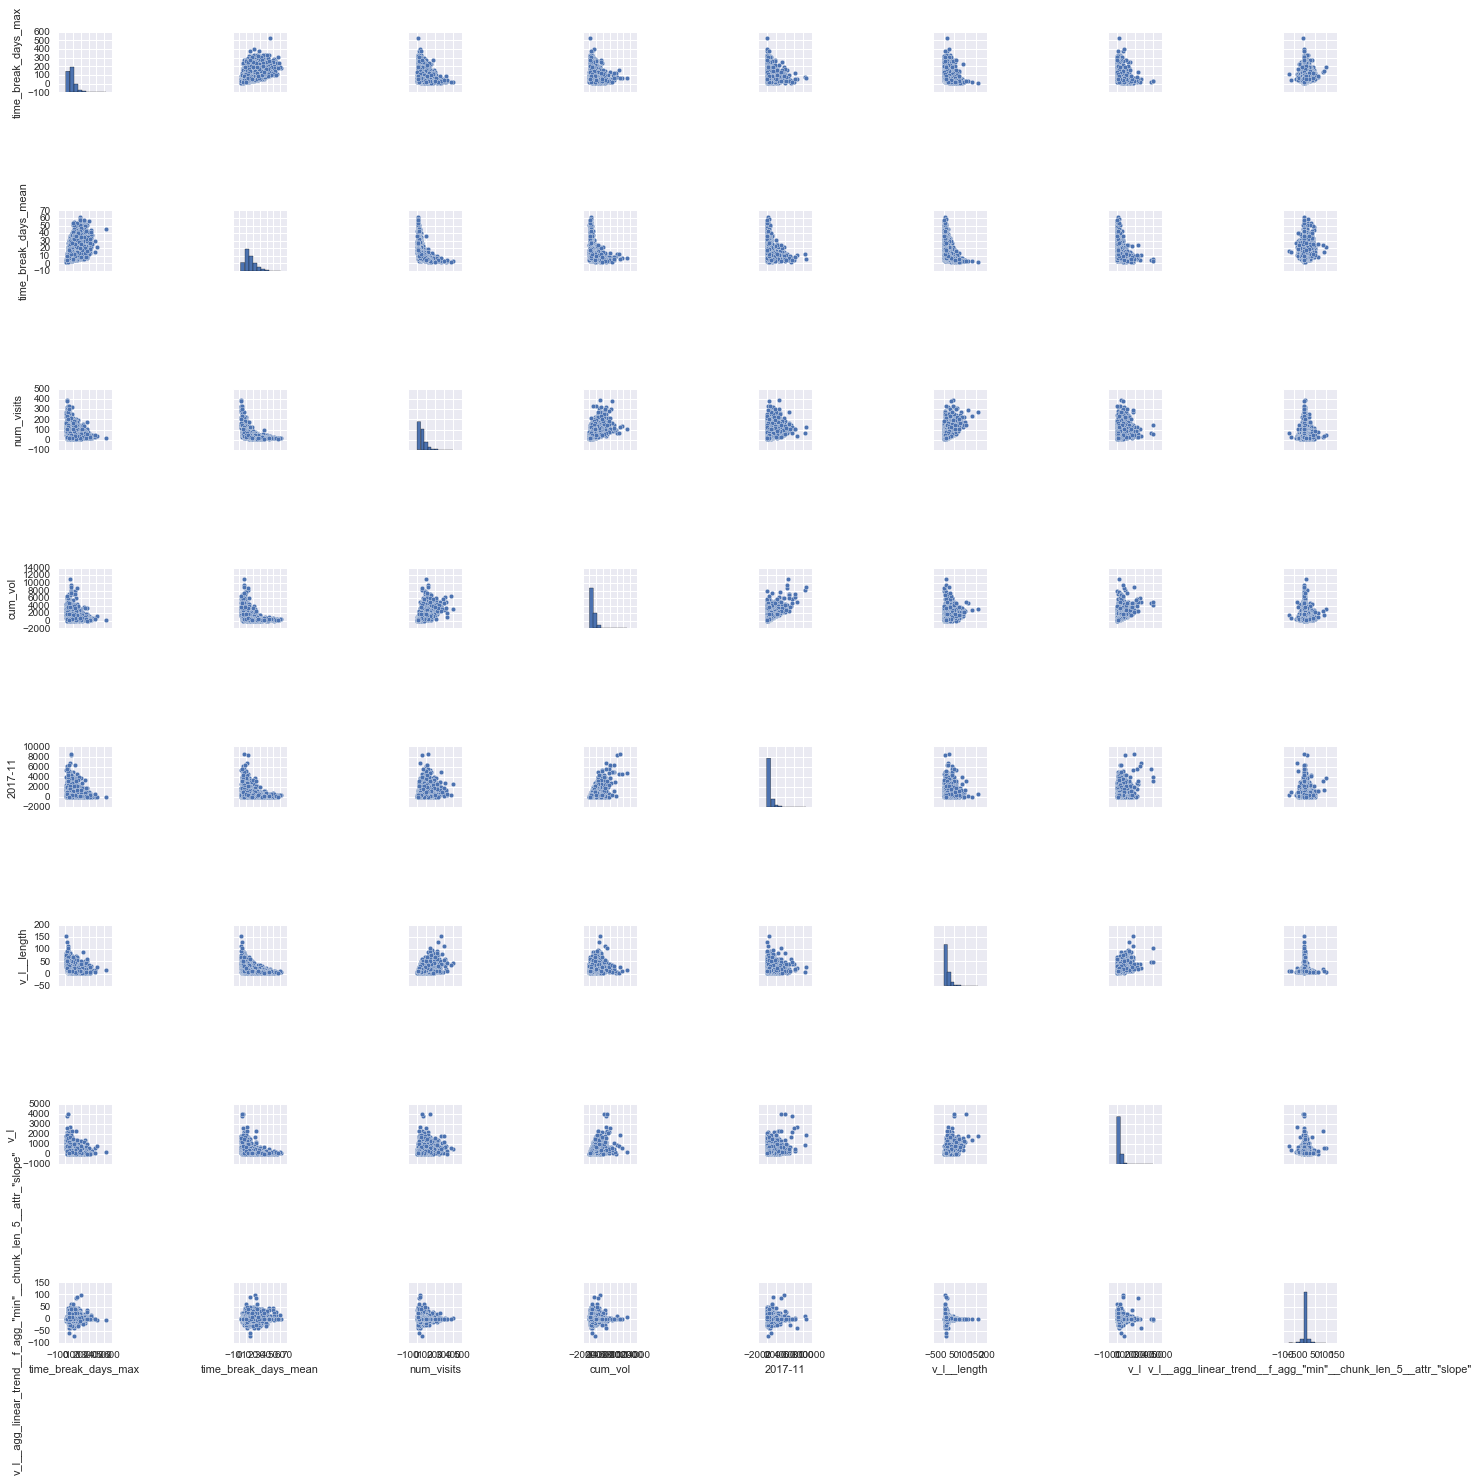

In [62]:
sns.pairplot(full_df_preds[(df_preds.kNN1 == 0) & (df_preds.RFC1 == 0) & (df_preds.XGB1 == 0) & (df_preds.target == 1)].iloc[:,7:15])

In [53]:
sns.pairplot(full_df_preds[(df_preds.kNN1 == 0) & (df_preds.RFC1 == 0) & (df_preds.XGB1 == 0) & (df_preds.target == 0)].iloc[:,7:15])

,kNN,RFC,XGB,target,kNN1,RFC1,XGB1,time_break_days_max,time_break_days_mean,num_visits,...,percent,most_popular_azs,v_l__c3__lag_2,mean_vol,sum_q,v_l__percentage_of_reoccurring_values_to_all_values,v_l__count_above_mean,v_l__ratio_beyond_r_sigma__r_1,q,"v_l__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept"""
count,44760.000000,44760.000000,44760.000000,44760.0,44760.0,44760.0,44760.0,44760.000000,44760.000000,44760.000000,...,44760.000000,4.476000e+04,4.476000e+04,44760.000000,44760.000000,44760.000000,44760.000000,44760.000000,44760.000000,44760.000000
mean,0.102079,0.105493,0.106896,0.0,0.0,0.0,0.0,60.000089,10.166377,96.925670,...,871.454491,3.084096e+06,1.794832e+04,19.053449,22.984651,0.496482,15.140237,0.305703,8.580898,3.334205
std,0.093596,0.098914,0.102101,0.0,0.0,0.0,0.0,46.520277,6.131404,71.160102,...,1125.587573,2.462179e+07,1.720388e+05,9.240811,40.281595,0.236529,11.681884,0.140839,27.197130,6.425397
min,0.000000,0.007690,0.005467,0.0,0.0,0.0,0.0,3.000000,1.136364,3.000000,...,-107.270000,1.091000e+03,-2.218978e+03,0.000000,-1.000000,0.000000,0.000000,0.000000,-5.000000,-69.805357
25%,0.030000,0.029877,0.030463,0.0,0.0,0.0,0.0,30.000000,5.962876,49.000000,...,72.652500,2.470000e+03,1.738386e+03,13.510762,4.000000,0.333333,7.000000,0.200000,1.000000,0.000000
50%,0.073333,0.072700,0.070868,0.0,0.0,0.0,0.0,46.000000,8.609756,79.000000,...,555.105000,3.234000e+03,5.495349e+03,17.989836,12.000000,0.520000,12.000000,0.285714,4.000000,0.000000
75%,0.143333,0.146445,0.151048,0.0,0.0,0.0,0.0,73.000000,12.615385,123.000000,...,1204.120000,9.149000e+03,1.321658e+04,22.947164,29.000000,0.666667,20.000000,0.390244,11.000000,6.289077
max,0.500000,0.499346,0.499954,0.0,0.0,0.0,0.0,578.000000,71.666667,999.000000,...,32568.010000,2.000020e+08,1.812127e+07,201.102941,3975.000000,1.000000,152.000000,0.941176,3708.000000,101.511667


In [69]:
full_df_preds[(df_preds.kNN1 == 0) & (df_preds.RFC1 == 0) & (df_preds.XGB1 == 0) & (df_preds.target == 1)].to_csv('errors.csv')